## Лабораторная работа №4 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import sys
from scipy import stats

Music_file_path = "C:\\Users\\Pankratz\\Desktop\\SAD\\SpotifyFeatures.csv"
Music_data = pd.read_csv(Music_file_path)
Music_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
Music_data.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [4]:
Music_data1 = Music_data.head(1000)

<function matplotlib.pyplot.show(close=None, block=None)>

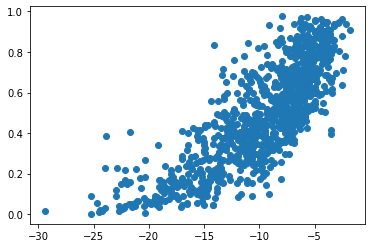

In [5]:

energy = Music_data1['energy'].values.tolist()
loudness = Music_data1['loudness'].values.tolist()
plt.scatter(loudness, energy)
plt.show

### Подбор степени многочлена

In [6]:
def design_matrix(x, m):
    n = len(x)
    D = np.zeros((n, m+1)) 
    for i in range(n):
        for j in range(m+1):
            D[i][j] = x[i]**j
    return D
    

In [7]:
x_test = [1,2,3,4, 5]
D = design_matrix(x_test, 3)
D

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

С помощью этой функции мы можем строить матрицы для аппроксимации многочленами разного порядка m.

In [8]:
def R2(x, y, poly):
    
    y_mean = np.mean(y)
    temp_arr = np.subtract(y, y_mean) ** 2
    TSS = np.sum(temp_arr, dtype= 'float64')
    
    y_hat = np.array([poly(xi) for xi in x])
    temp_arr2 = np.subtract(y, y_hat) ** 2
    RSS = np.sum(temp_arr2, dtype= 'float64')

    R2 = (TSS - RSS) / TSS
    return R2

Построим многочлен 1-го порядка:

In [9]:
D = design_matrix(loudness, 1)
A = D.T @ D
b = D.T @ energy
beta = np.linalg.solve(A, b)
poly = lambda x: beta[0] + beta[1]*x
print("Приближающий многочлен первой степени: " + str(beta[1]) + "*x + " + str(beta[0]))

Приближающий многочлен первой степени: 0.04188878151984961*x + 0.905781767559334


In [10]:
R2(loudness, energy, poly)

0.6594080270822186

Построим многочлен 2-го порядка

In [11]:
D = design_matrix(loudness, 2)
A = D.T @ D
b = D.T @ energy
beta = np.linalg.solve(A, b)
poly2 = lambda x: beta[0] + beta[1]*x + beta[2]*(x**2)
print("Приближающий многочлен  степени: " + str(beta[2]) + "*x^2 + " + str(beta[1]) + "*x + " + str(beta[0]))

Приближающий многочлен  степени: 0.0014707675244593154*x^2 + 0.07747122471214386*x + 1.0800124200620669


In [12]:
R2(loudness, energy, poly2)

0.6883736649664937

In [13]:
D = design_matrix(loudness, 3)
A = D.T @ D
b = D.T @ energy
beta = np.linalg.solve(A, b)
poly3 = lambda x: beta[0] + beta[1]*x + beta[2]*(x**2) + beta[3]*(x**3)
print("Приближающий многочлен третьей степени: " + str(beta[3]) + "*x^3 + " + str(beta[2]) + "*x^2 + " + str(beta[1]) + "*x +  " + str(beta[0]))

Приближающий многочлен третьей степени: -1.138262649294267e-05*x^3 + 0.0010206519256443524*x^2 + 0.07230102358935747*x +  1.063302779469403


In [14]:
R2(loudness, energy, poly3)

0.6884512163195011

In [15]:
D = design_matrix(loudness, 4)
A = D.T @ D
b = D.T @ energy
beta = np.linalg.solve(A, b)
poly4 = lambda x: beta[0] + beta[1]*x + beta[2]*(x**2) + beta[3]*(x**3) + beta[4]*(x**4)
print("Приближающий многочлен четвёртой степени: " + str(beta[4]) + "*x^4 + " + str(beta[3]) + "*x^3 + " + str(beta[2]) + "*x^2 " + str(beta[1]) + "*x " + str(beta[0]))

Приближающий многочлен четвёртой степени: -1.808463340669289e-06*x^4 + -0.00011253036469689066*x^3 + -0.000891784948438178*x^2 0.058141766848307234*x 1.0293769892214315


In [16]:
R2(loudness, energy, poly4)

0.6885686979196478

In [17]:
D = design_matrix(loudness, 5)
A = D.T @ D
b = D.T @ energy
beta = np.linalg.solve(A, b)
poly4 = lambda x: beta[0] + beta[1]*x + beta[2]*(x**2) + beta[3]*(x**3) + beta[4]*(x**4) + beta[5]*(x**5)
print("Приближающий многочлен четвёртой степени: " + str(beta[0]) + "*x^4 + " + str(beta[1]) + "*x^3 + " + str(beta[2]) + "*x^2 " + str(beta[3]) + "*x " + str(beta[3]))

Приближающий многочлен четвёртой степени: 1.0149778274496306*x^4 + 0.05042519727723862*x^3 + -0.002332808322828157*x^2 -0.00023154963895609845*x -0.00023154963895609845


Коэффициенты при $x^{4}$ и $x^{3}$ близки к нулю и $R^{2}$ почти не изменяется, поэтому берем многочлен второй степени.

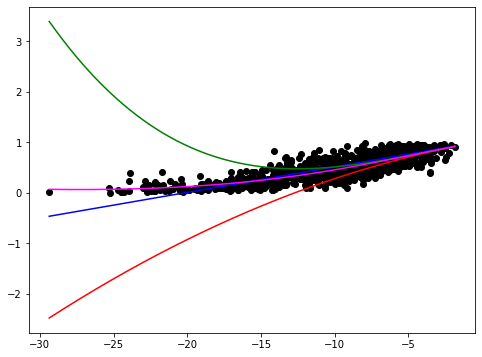

In [18]:
x_full = np.arange(min(loudness), max(loudness), 0.01)

p1_vals = [poly(xi) for xi in x_full]
p2_vals = [poly2(xi) for xi in x_full]
p3_vals = [poly3(xi) for xi in x_full]
p4_vals = [poly4(xi) for xi in x_full]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_full, p1_vals , color = 'blue')
ax.plot(x_full, p2_vals, color = 'red')
ax.plot(x_full, p3_vals , color = 'green')
ax.plot(x_full, p4_vals, color = 'magenta')
ax.scatter(loudness, energy, color = 'black')


Из графика видно, что на самом деле многочлены третьей и четвёртой степеней приближают лучше, чем многочлен второй степени (вероятно, из-за выброса). Возьмём многочлен третьей степени.

### Проверка нормальности распределения остатков (Хи-квадрат)

In [19]:
def to_nominal(X, numIntervals = 100):
    meshX = np.linspace(min(X), max(X), numIntervals)
    XNominal = np.zeros(numIntervals)
    for xi in X: 
        for i in range(1, numIntervals, 1):
            if meshX[i-1] < xi and xi <= meshX[i]:
                XNominal[i-1] += 1
    return XNominal, meshX

In [20]:
def chi_square(X, alpha = 0.05, numIntervals = 100):
    X_nominal, meshX = to_nominal(X, numIntervals)
    p_arr = np.zeros(numIntervals)
    for i in range(1, numIntervals):
        p = stats.norm.cdf(meshX[i]) - stats.norm.cdf(meshX[i-1])
        p_arr[i-1] = p
    temp_arr = np.divide(X_nominal, X.shape[0])
    temp_arr2 = np.subtract(temp_arr, p_arr) ** 2
    summa_chlen = np.divide(temp_arr2, p_arr)
    summa_chlen[summa_chlen == np.inf] = 0
    t_value = X.shape[0] * np.nansum(summa_chlen)
    pValue = 1 - stats.chi2.cdf(t_value, df = numIntervals)
    print(pValue)
    if pValue > alpha:
        complete = 0
    else:
        complete = 1
    return complete

In [21]:
y_hat = np.array([poly3(xi) for xi in loudness])
temp_arr2 = np.subtract(energy, y_hat) ** 2

In [22]:
chi_square(eps, 0.05)

NameError: name 'eps' is not defined

Наша проверка показала, что остатки не распределены нормально.

### Строим М-оценки

In [23]:
def MHuber(delta, x): 
    return (x ** 2) / 2 if abs(x) < delta else delta*(abs(x) - delta/2)

def MTukey(delta, x):
    return 1 - (1 - (x/delta) ** 2) ** 3 if abs(x) < delta else 1

def MHuber_hat(theta, D, y, delta):
    return np.sum( [MHuber(delta, yi - np.sum(theta * di)) for yi, di in zip(y, D)] )

def MTukey_hat(theta, D, y, delta):
    return np.sum( [MTukey(delta, yi - np.sum(theta * di)) for yi, di in zip(y, D)] )

In [24]:
D = design_matrix(loudness, 3)
A = D.T @ D
b = D.T @ energy
beta = np.linalg.solve(A, b)

In [25]:
from scipy.optimize import fmin
res_Huber = fmin(MHuber_hat, beta, args = (D, energy, 1))

Optimization terminated successfully.
         Current function value: 9.434256
         Iterations: 34
         Function evaluations: 66


In [26]:
res_Tukey = fmin(MTukey_hat, beta, args = (D, energy, 1))

Optimization terminated successfully.
         Current function value: 53.212806
         Iterations: 139
         Function evaluations: 234


In [27]:
y_pred_Huber = D @ res_Huber
y_pred_Tukey = D @ res_Tukey

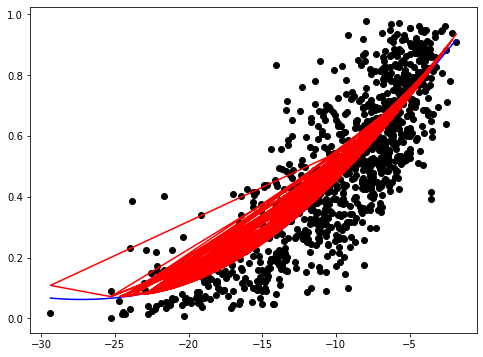

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_full, p4_vals , color = 'blue')
ax.plot(loudness, y_pred_Huber, color = 'red')
ax.scatter(loudness, energy, color = 'black')

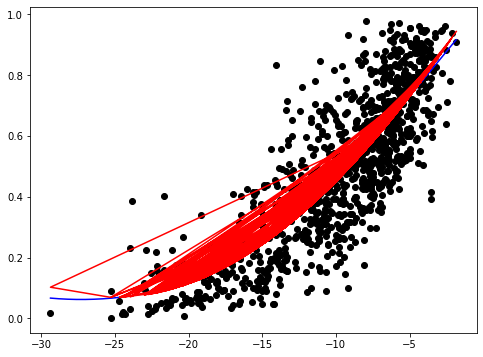

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_full, p4_vals , color = 'blue')
ax.plot(loudness, y_pred_Tukey, color = 'red')
ax.scatter(loudness, energy, color = 'black')